In [1]:
!pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!pip install opencv-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip install opencv-contrib-python


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

train_dataset = train.flow_from_directory("D:/Project/III Year/archive/other/Training and Validation/",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='binary')
test_dataset = test.flow_from_directory("D:/Project/III Year/archive/forest_fire/Testing/",
                                          target_size=(150,150),
                                          batch_size=32,
                                          class_mode='binary')

Found 3468 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [3]:
test_dataset.class_indices

{'fire': 0, 'nofire': 1}

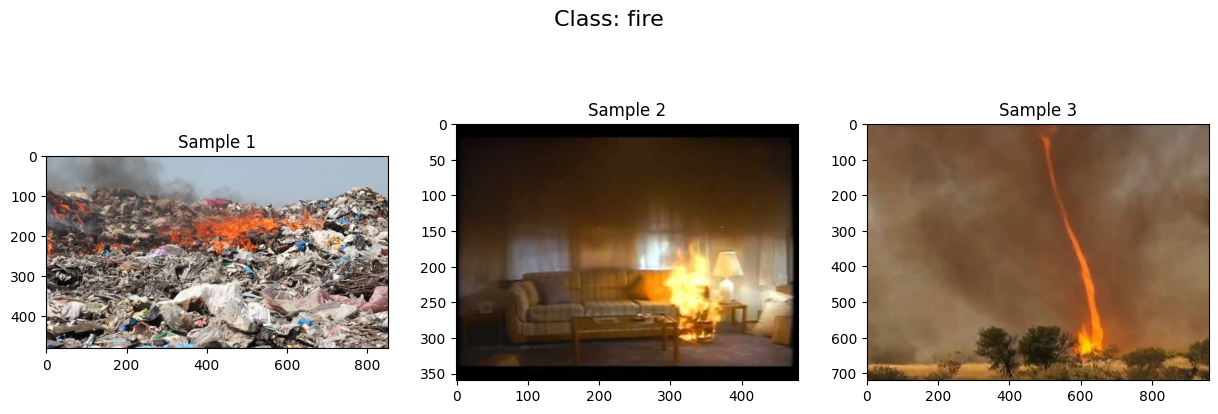

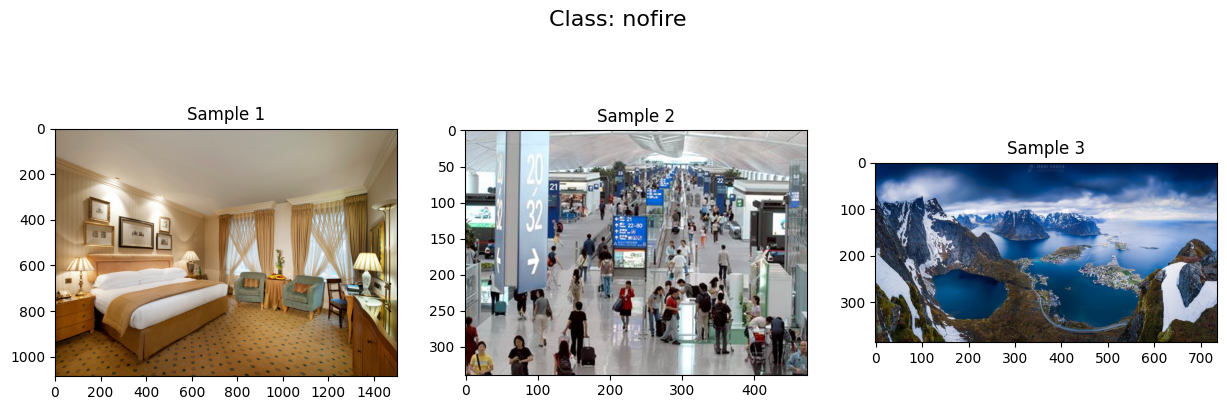

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to display sample images
def display_samples(dataset_path, num_samples_per_class=3):
    class_names = os.listdir(dataset_path)

    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        image_files = os.listdir(class_path)[:num_samples_per_class]

        plt.figure(figsize=(15, 5))
        plt.suptitle(f"Class: {class_name}", fontsize=16)

        for i, image_file in enumerate(image_files, 1):
            image_path = os.path.join(class_path, image_file)
            img = cv2.imread(image_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            plt.subplot(1, num_samples_per_class, i)
            plt.imshow(img)
            plt.title(f"Sample {i}")

        plt.show()

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
display_samples(dataset_path)


In [7]:
import os
import cv2

def get_image_dimensions(dataset_path):
    image_dimensions = []

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Error handling: Check if the image is successfully loaded
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error loading image: {image_path}")
                continue

            # If the image is loaded successfully, get its dimensions
            dimensions = img.shape[:2]  # Height, Width
            image_dimensions.append(dimensions)

    return image_dimensions

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
dimensions = get_image_dimensions(dataset_path)

# Print the dimensions or perform further analysis
print("Image Dimensions:")
for dimension in dimensions[:5]:  # Display dimensions of the first 5 images
    print(dimension)


Image Dimensions:
(480, 852)
(360, 480)
(720, 960)
(442, 630)
(531, 800)


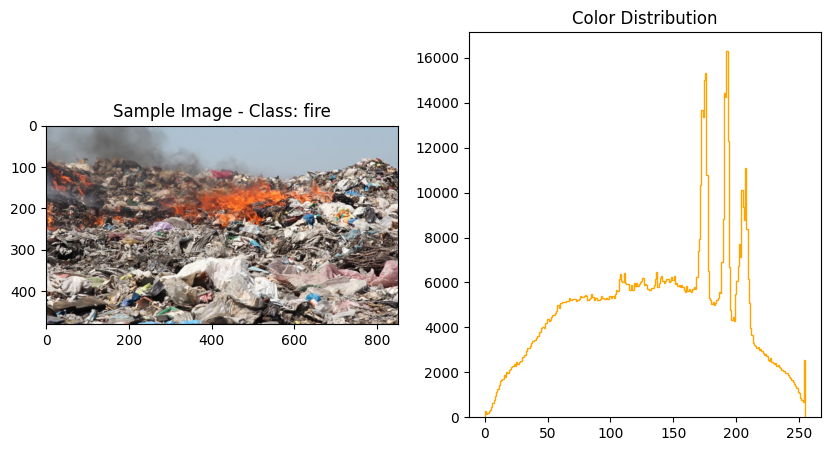

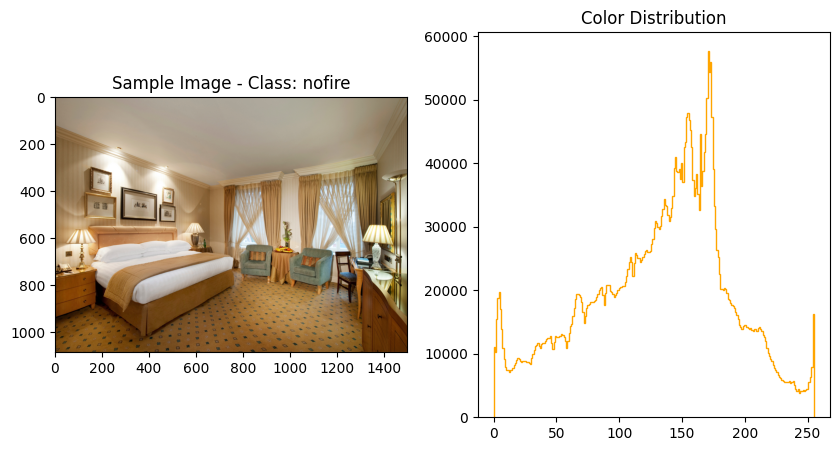

In [6]:
import os
import cv2
import matplotlib.pyplot as plt

def visualize_color_distribution(dataset_path):
    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)
        image_path = os.path.join(class_path, os.listdir(class_path)[0])
        
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(f"Sample Image - Class: {class_name}")

        plt.subplot(1, 2, 2)
        plt.hist(img.ravel(), bins=256, color='orange', histtype='step')
        plt.title("Color Distribution")

        plt.show()

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
visualize_color_distribution(dataset_path)


In [10]:
def calculate_correlation(dataset_path):
    data = {'Class': [], 'Mean_Brightness': [], 'Mean_Colorfulness': []}

    for class_name in os.listdir(dataset_path):
        class_path = os.path.join(dataset_path, class_name)

        for image_file in os.listdir(class_path):
            image_path = os.path.join(class_path, image_file)

            # Error handling: Check if the image is successfully loaded
            img = cv2.imread(image_path)
            if img is None:
                print(f"Error loading image: {image_path}")
                continue

            # If the image is loaded successfully, calculate mean brightness and colorfulness
            # Calculate mean brightness
            mean_brightness = np.mean(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY))

            # Calculate mean colorfulness
            mean_colorfulness = np.mean(cv2.absdiff(cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 1], cv2.cvtColor(img, cv2.COLOR_BGR2HSV)[:, :, 2]))

            # Use one-hot encoding for the 'Class' column
            data['Class'].append(class_name)
            data['Mean_Brightness'].append(mean_brightness)
            data['Mean_Colorfulness'].append(mean_colorfulness)

    df = pd.DataFrame(data)

    # Convert 'Class' column to numeric using one-hot encoding
    df = pd.get_dummies(df, columns=['Class'], drop_first=True)

    correlation_matrix = df.corr()

    return correlation_matrix

# Example usage:
dataset_path = 'D:/Project/III Year/archive/other/Training and Validation/'
correlation_matrix = calculate_correlation(dataset_path)

# Print the correlation matrix or perform further analysis
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                   Mean_Brightness  Mean_Colorfulness  Class_nofire
Mean_Brightness           1.000000          -0.030564      0.318823
Mean_Colorfulness        -0.030564           1.000000      0.048825
Class_nofire              0.318823           0.048825      1.000000


In [69]:
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [70]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [71]:
r=model.fit(train_dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
109/109 [==============================] - 41s 363ms/step - loss: 0.3418 - accuracy: 0.8532 - val_loss: 0.2084 - val_accuracy: 0.9412
Epoch 2/10
109/109 [==============================] - 37s 339ms/step - loss: 0.2546 - accuracy: 0.9048 - val_loss: 0.3088 - val_accuracy: 0.8529
Epoch 3/10
109/109 [==============================] - 36s 334ms/step - loss: 0.2121 - accuracy: 0.9268 - val_loss: 0.1465 - val_accuracy: 0.9265
Epoch 4/10
109/109 [==============================] - 39s 353ms/step - loss: 0.1554 - accuracy: 0.9455 - val_loss: 0.1450 - val_accuracy: 0.9559
Epoch 5/10
109/109 [==============================] - 49s 450ms/step - loss: 0.1402 - accuracy: 0.9461 - val_loss: 0.1142 - val_accuracy: 0.9559
Epoch 6/10
109/109 [==============================] - 48s 444ms/step - loss: 0.1119 - accuracy: 0.9567 - val_loss: 0.0838 - val_accuracy: 0.9853
Epoch 7/10
109/109 [==============================] - 42s 380ms/step - loss: 0.0995 - accuracy: 0.9660 - val_loss: 0.1310 - val_ac

In [72]:
predictions=model.predict(test_dataset)
predictions=np.round(predictions)

3/3 [==============================] - 5s 66ms/step


In [73]:
predictions

array([[1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.]], dtype=float32)

In [74]:
print(len(predictions))

68


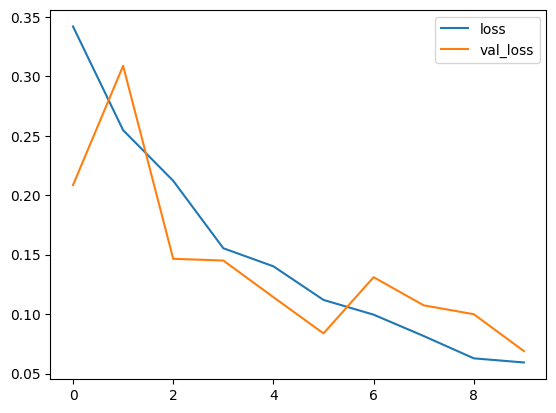

In [75]:
import matplotlib .pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

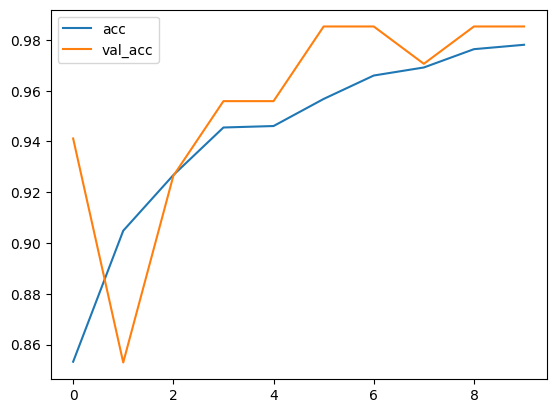

In [76]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [77]:
def predictImage(filename):
    img1=image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y=image.img_to_array(img1)
    X=np.expand_dims(Y,axis=0)
    val=model.predict(X)
    print(val)
    if val==1:
        plt.xlabel("No Fire",fontsize=30)
    elif val==0:
        plt.xlabel("Fire",fontsize=30)

1/1 [==============================] - 0s 260ms/step
[[0.]]


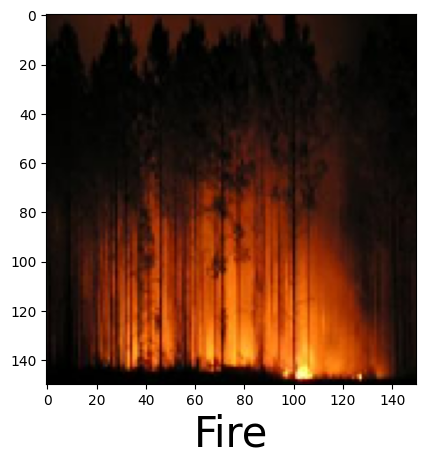

In [78]:
predictImage("D:/Project/III Year/archive/forest_fire/Testing/fire/abc176.jpg")

1/1 [==============================] - 0s 61ms/step
[[1.]]


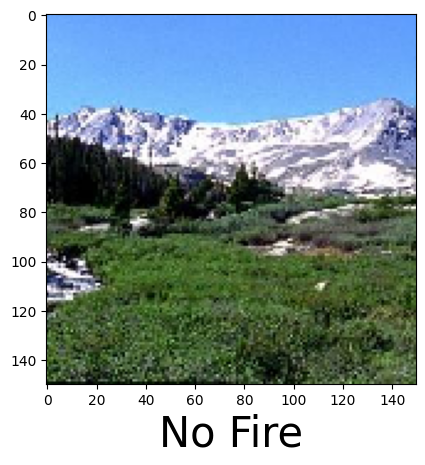

In [79]:
predictImage("D:/Project/III Year/archive/forest_fire/Testing/nofire/abc337.jpg")

1/1 [==============================] - 0s 62ms/step
[[0.]]


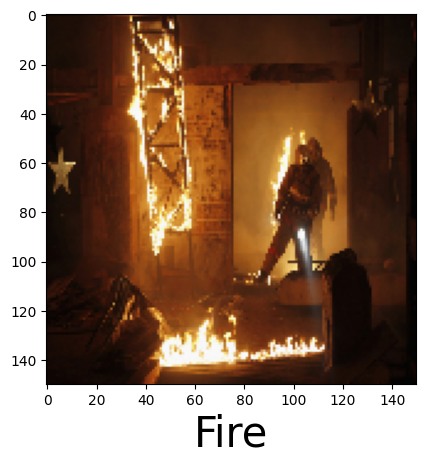

In [80]:
predictImage("D:/Project/III Year/Fire-Detection/train/1/3.jpg")

1/1 [==============================] - 0s 50ms/step
[[1.]]


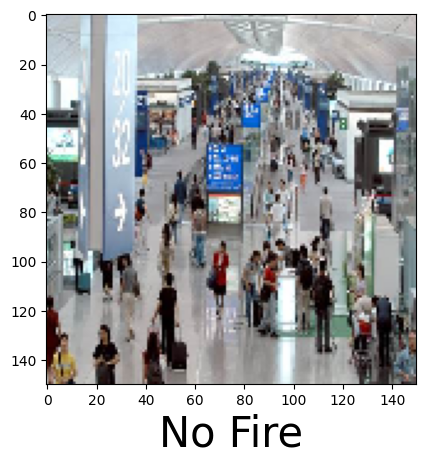

In [81]:
predictImage("D:/Project/III Year/Fire-Detection/train/0/10.jpg")

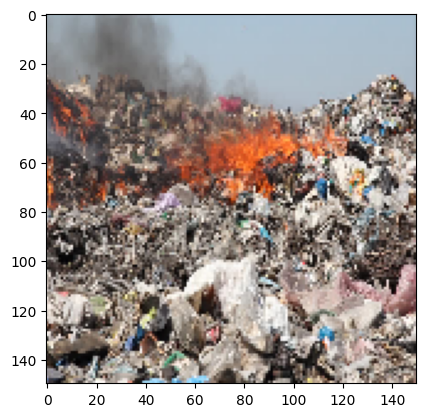

1/1 [==============================] - 0s 49ms/step
Fire


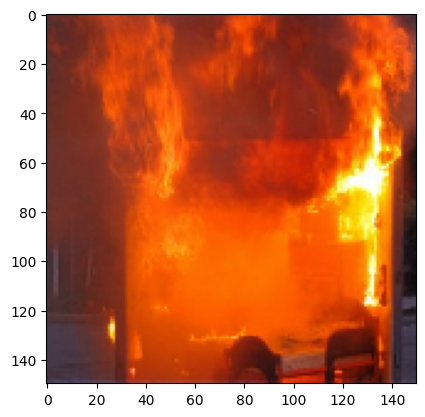

1/1 [==============================] - 0s 59ms/step
Fire


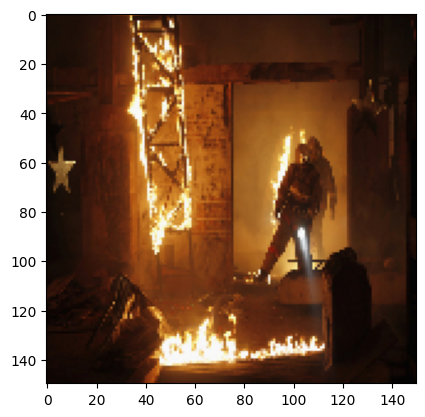

1/1 [==============================] - 0s 61ms/step
Fire
File Not Found: 4.jpg


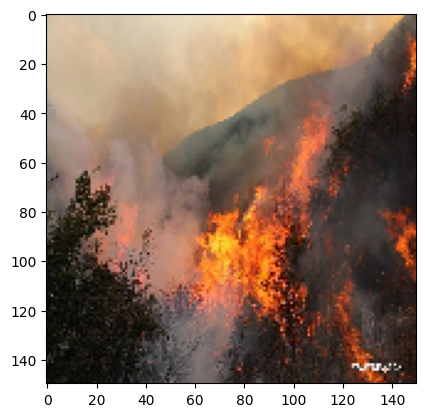

1/1 [==============================] - 0s 54ms/step
Fire


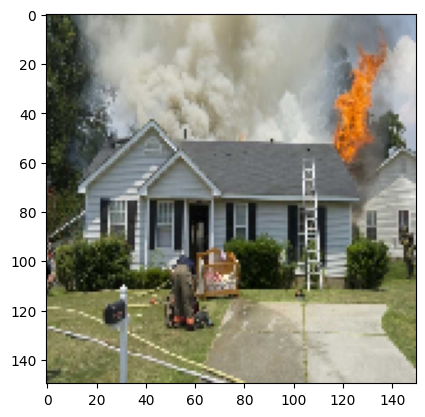

1/1 [==============================] - 0s 55ms/step
Fire


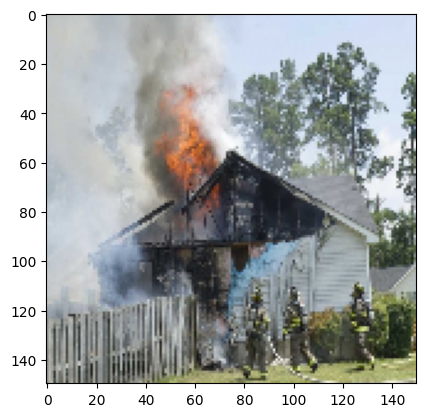

1/1 [==============================] - 0s 57ms/step
Fire


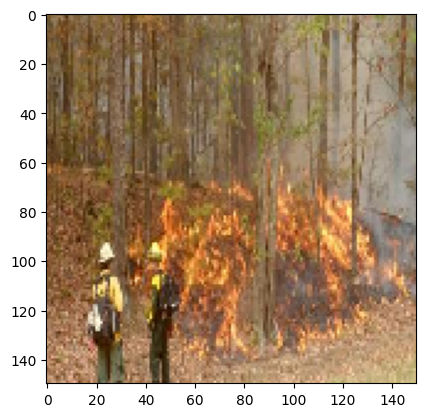

1/1 [==============================] - 0s 49ms/step
Fire


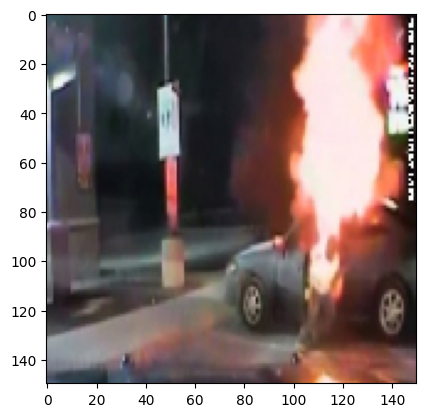

1/1 [==============================] - 0s 66ms/step
Fire


In [82]:
def pi(filename):
    img = image.load_img(filename, target_size=(150, 150))
    plt.imshow(img)
    #plt.axis('off')  # Turn off axis for better visualization
    plt.show()

    # Preprocess the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    prediction = model.predict(img_array)

    # Display the prediction result
    if prediction[0][0] > 0.5:  # Assuming 0 is fire, and 1 is no fire
        label = "No Fire"
    else:
        label = "Fire"
    print(label)
    #plt.xlabel(label, fontsize=12)
    #plt.show()

# Assuming you have images named from 1.jpg to 9.jpg
for i in range(1, 10):
    try:
        filename = f"D:/Project/III Year/Fire-Detection/train/1/{i}.jpg"
        pi(filename)
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")


In [84]:
def picount(filename):
    img = image.load_img(filename, target_size=(150, 150))
    #plt.imshow(img)
    #plt.axis('off')  # Turn off axis for better visualization
    #plt.show()

    # Preprocess the image for prediction
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    prediction = model.predict(img_array)

    # Display the prediction result
    if prediction[0][0] > 0.5:  # Assuming 0 is fire, and 1 is no fire
        label = "No Fire"
    else:
        label = "Fire"
    #print(label)
    #plt.xlabel(label, fontsize=12)
    #plt.show()
    return label
l=[]
# Assuming you have images named from 1.jpg to 9.jpg
for i in range(1, 100):
    try:
        filename = f"D:/Project/III Year/Fire-Detection/train/1/{i}.jpg"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 59ms/step
File Not Found: 4.jpg
1/1 [==============================] - 0s 24ms/step
File Not Found: 33.jpg
1/1 [==============================] - 0s 48ms/step
File Not Found: 97.jpg
1/1 [==============================] - 0s 44ms/step
96 0 96


In [24]:
l=[]
for i in range(1, 756):
    try:
        filename = f"D:/Project/III Year/fire_dataset/train/1/fire.{i}.png"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 66ms/step
696 59 755


In [85]:
l=[]
for i in range(1, 244):
    try:
        filename = f"D:/Project/III Year/fire_dataset/train/0/non_fire.{i}.png"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 54ms/step
5 238 243


In [50]:
l=[]
for i in range(1, 110):
    try:
        filename = f"D:/Project/III Year/Fire-Detection/train/1/{i}.jpg"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 59ms/step
File Not Found: 4.jpg
1/1 [==============================] - 0s 65ms/step
File Not Found: 33.jpg
1/1 [==============================] - 0s 53ms/step
File Not Found: 97.jpg
1/1 [==============================] - 0s 46ms/step
File Not Found: 105.jpg
1/1 [==============================] - 0s 57ms/step
105 0 105


In [51]:
l=[]
for i in range(1, 541):
    try:
        filename = f"D:/Project/III Year/Fire-Detection/train/0/{i}.jpg"
        l.append(picount(filename))
        
    except FileNotFoundError:
        print(f"File Not Found: {i}.jpg")
print(l.count("Fire"),l.count("No Fire"),len(l))

1/1 [==============================] - 0s 66ms/step
File Not Found: 11.jpg
1/1 [==============================] - 0s 49ms/step
File Not Found: 51.jpg
1/1 [==============================] - 0s 63ms/step
File Not Found: 122.jpg
1/1 [==============================] - 0s 42ms/step
File Not Found: 128.jpg
1/1 [==============================] - 0s 47ms/step
File Not Found: 156.jpg
1/1 [==============================] - 0s 49ms/step
File Not Found: 173.jpg
1/1 [==============================] - 0s 43ms/step
File Not Found: 197.jpg
1/1 [==============================] - 0s 54ms/step
File Not Found: 287.jpg
1/1 [==============================] - 0s 52ms/step
File Not Found: 293.jpg
1/1 [==============================] - 0s 56ms/step
File Not Found: 427.jpg
1/1 [==============================] - 0s 41ms/step
File Not Found: 444.jpg
1/1 [==============================] - 0s 38ms/step
File Not Found: 449.jpg
1/1 [==============================] - 0s 46ms/step
File Not Found: 451.jpg
1/1 [=========

In [52]:
from tensorflow import keras

# Assuming you have already trained your model and stored it in the variable 'model'
# ... (Your model training code here)

# Save the entire model to a file
model.save('fire_detection_model.h5')

# If you want to save only the architecture (not the weights and optimizer state), you can use:
# model.save('fire_detection_model_architecture.h5', save_format='h5')

# To save only the weights, you can use:
# model.save_weights('fire_detection_model_weights.h5')


C:\Users\TOM & JERRY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [86]:
import os
folder_path = "D:/Project/III Year/archive/other/Training and Validation/fire"  # Replace with the actual path to your image folder
f=0
nf=0
c=0
for filename in os.listdir(folder_path):
    #print(filename)
    c+=1
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img_path = os.path.join(folder_path, filename)
        #picount(img_path)
        
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the pixel values
        
        # Get the model's prediction
        prediction = model.predict(img_array)
        #predicted_class = "No Fire" if prediction > 0.5 else "Fire"
        
        #print(f"Image: {filename}, Prediction: {predicted_class}")
        if prediction>0.5:
            f+=1
        else:
            nf+=1
    else:
        print("Not Found", filename)

1/1 [==============================] - 0s 38ms/step


In [88]:
print(f,nf,c)

2 1791 1793


In [89]:
folder_path = "D:/Project/III Year/archive/other/Training and Validation/nofire"  # Replace with the actual path to your image folder
f=0
nf=0
c=0
for filename in os.listdir(folder_path):
    #print(filename)
    c+=1
    if filename.endswith(".jpg") or filename.endswith(".png"):
        
        img_path = os.path.join(folder_path, filename)
        #picount(img_path)
        
        # Load and preprocess the image
        img = image.load_img(img_path, target_size=(150, 150))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the pixel values
        
        # Get the model's prediction
        prediction = model.predict(img_array)
        #predicted_class = "No Fire" if prediction > 0.5 else "Fire"
        
        #print(f"Image: {filename}, Prediction: {predicted_class}")
        if prediction>0.5:
            f+=1
        else:
            nf+=1
    else:
        print("Not Found", filename)

1/1 [==============================] - 0s 48ms/step


In [90]:
print(f,nf,c)

1649 26 1675


In [91]:
from tensorflow import keras

# Assuming you have already trained your model and stored it in the variable 'model'
# ... (Your model training code here)

# Save the entire model to a file in the native Keras format
model.save('fire.keras')


In [92]:
from tensorflow import keras

# Assuming you have already trained your model and stored it in the variable 'model'
# ... (Your model training code here)

# Save the entire model to a file
model.save('fire_detection_model.h5')

# If you want to save only the architecture (not the weights and optimizer state), you can use:
# model.save('fire_detection_model_architecture.h5', save_format='h5')

# To save only the weights, you can use:
# model.save_weights('fire_detection_model_weights.h5')


C:\Users\TOM & JERRY\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
